# Visualization

Visualizing the results from the [notebook.ipynb](./notebook.ipynb) where Machine Learning models were trained and evaluated.

In [1]:
from utils.utils import Pickler

import matplotlib.pyplot as plt
import numpy as np

## Data

In [2]:
filename = './data/metrics.pkl'
results = Pickler(filename).load()

In [3]:
print(results.keys())

dict_keys(['linear_regression', 'ridge_regression', 'lasso_regression', 'decision_tree_regressor', 'random_forest_regressor', 'svr', 'k_neighbors_regressor'])


# Scores

In [4]:
r2_scores = {}
rmse_scores = {}

for model in results:
    if model not in r2_scores:
            r2_scores[model] = results[model]['R^2']
            rmse_scores[model] = results[model]['RMSE']

print(r2_scores)
print(rmse_scores)

{'linear_regression': 0.9999925942960032, 'ridge_regression': 0.9999925936723051, 'lasso_regression': 0.9999922827461227, 'decision_tree_regressor': 0.9889305541322851, 'random_forest_regressor': 0.9878324434143013, 'svr': -0.0780320262916443, 'k_neighbors_regressor': 0.9837584664112851}
{'linear_regression': 2073.6221637732187, 'ridge_regression': 2073.7094807322105, 'lasso_regression': 2116.790341363974, 'decision_tree_regressor': 80169.54002159539, 'random_forest_regressor': 84052.01681305743, 'svr': 791156.2858456691, 'k_neighbors_regressor': 97109.10885065967}


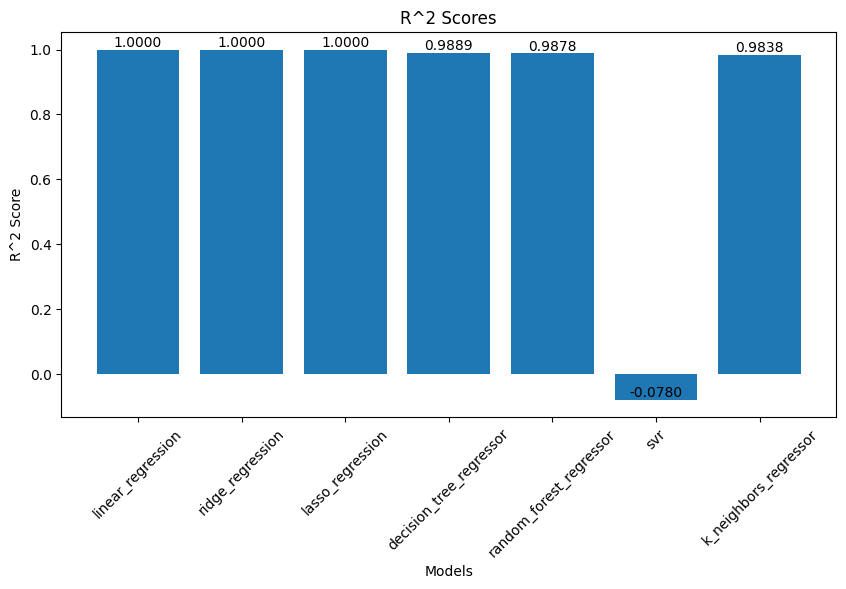

In [5]:
plt.figure(figsize=(10, 5))
plt.title('R^2 Scores')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)

bars = plt.bar(r2_scores.keys(), r2_scores.values())

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', 
             ha='center', va='bottom', fontsize=10)

plt.savefig('./image/r2_scores.png')
plt.show()

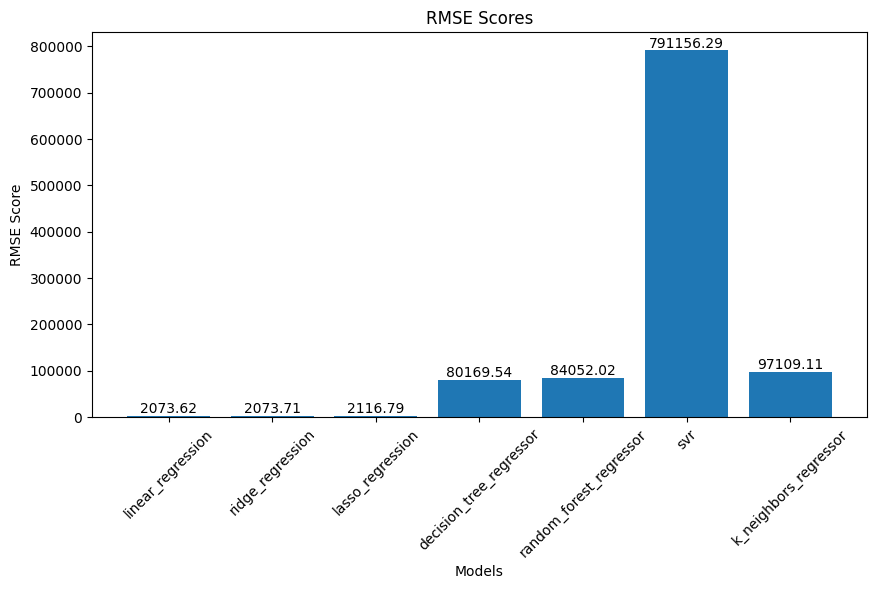

In [6]:
plt.figure(figsize=(10, 5))
plt.title('RMSE Scores')
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.xticks(rotation=45)

bars = plt.bar(rmse_scores.keys(), rmse_scores.values())

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.savefig('./image/rmse_scores.png')
plt.show()